In [3]:
%run '0.0_init_configuration.ipynb'

### Download data

In [118]:
df = pd.read_csv('../data/raw/Cardiovascular_Disease_Dataset.csv')
(
    df
    .head()
    .style
    .set_properties(
        **{
            'background-color': 'black',
            'color': 'lawngreen',
            'border-color': 'white'
        }
    )
)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.300000,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.700000,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.000000,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.200000,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.300000,3,2,1


### Data information

**1. How many columns and rows does the dataset have?**
* **Answer**: The dataset has 14 columns and 1000 rows.

In [119]:
df.shape

(1000, 14)

**2. What type of data are the veriables of dataset?**
* **Answer**: The dataset has numeric variables type `int64`(13) and `float64`(1).

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [121]:
df.dtypes.value_counts()

int64      13
float64     1
Name: count, dtype: int64

### Data Preprocessing

Handling Missing vlaues

**1. Are there any missing values in the dataset?**
* **Answer**: There are not any missing values in the dataset.

In [122]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

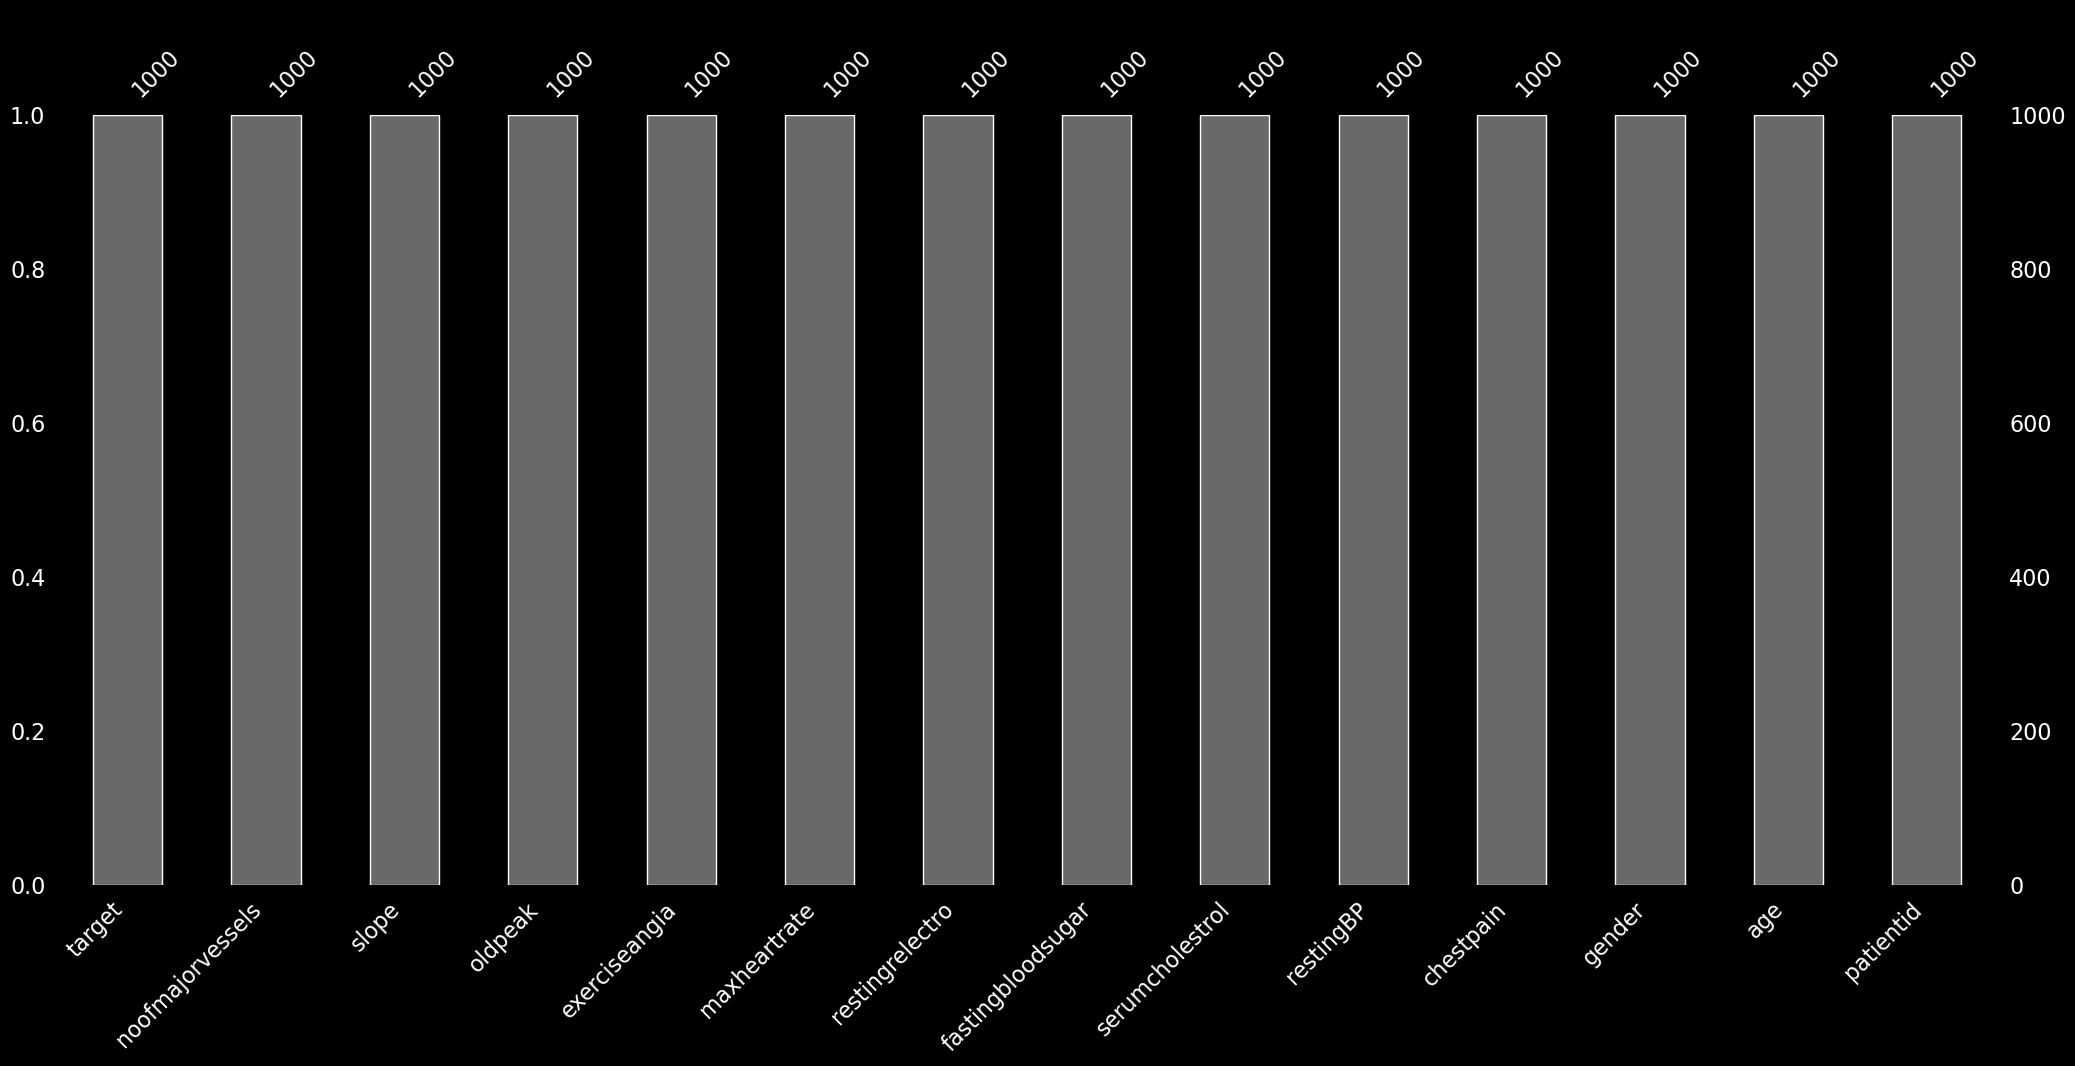

In [123]:
#Visualize missing values

missingno.bar(df, sort='descending');
plt.title('Missing Values Matrix', fontsize=25, color='black');

**2. Are there duplicated data in the dataset?** 

* **Answer**: The dataset does not contain any duplicated data. 

In [124]:
df.duplicated().sum()

0

In [125]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


### Exploratory Data Analysis (EDA)

### Is there any relation between target variable and inputs variables?

Based on the correlation matrix,the relationships between the `target` variable and the input variables are indentified as follows:

1. **Strong Correlation with `target`**:
* The variables `chestpain`(0.55), `restingBP`(0.48), `slope`(0.8), `noofmajorvessels`(0.5) exhibit strong correlation with the `target` variable. 

2. **Moderate correlation**:
* `serumcholesterol` (0.195) and `fastingbloodsugar`(0.278)

These correlations suggest that these variables are significant predictros and should be considered when building a machine learning models. 



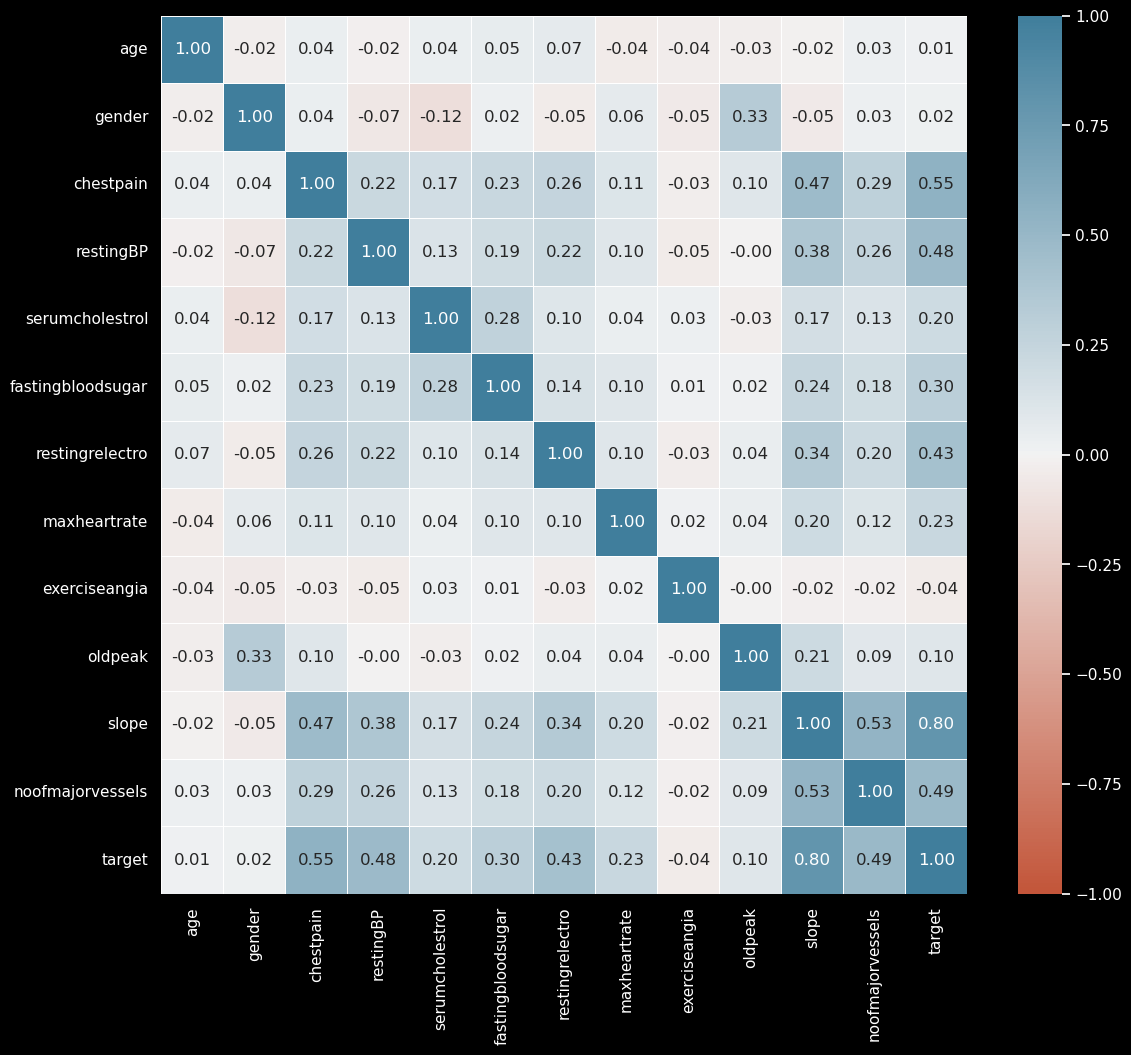

In [126]:
corre_matrix = df.drop(columns=['patientid']).corr()

sns.heatmap(
    data = corre_matrix,
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar={'shrink': 0.5},
    annot=True,
    fmt='.2f'
)
plt.show()

### 1. Age and gender Analysis 
* The range of the patients: 20 - 80  
* The oldest patients in the dataset:
    * Patient ID: 1160678
    * Age: 80
    * Gender: Female
    * Chest Pain: 1
    * Target: 1(Heart Disease)

* The youngest patient in the dataset:   
    * Patient ID: 463851
    * Age: 20
    * Gender: Female
    * Chest Pain: 0
    * Target: 0(No Heart Disease)
    

In [127]:
age_range = f'Age range: {df["age"].min()} - {df["age"].max()}'
age_range

'Age range: 20 - 80'

In [128]:
oldest_patient = df.loc[df['age'].idxmax()]
print(f'Details of the Oldest Patient:\n{oldest_patient}')

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


In [129]:
youngest_patient = df.loc[df['age'].idxmin()]
print(f'Details of the Youngest Patient:\n{youngest_patient}')

Details of the Youngest Patient:
patientid            463851.0
age                      20.0
gender                    1.0
chestpain                 0.0
restingBP               199.0
serumcholestrol         248.0
fastingbloodsugar         0.0
restingrelectro           0.0
maxheartrate             86.0
exerciseangia             1.0
oldpeak                   3.2
slope                     0.0
noofmajorvessels          0.0
target                    0.0
Name: 31, dtype: float64


Turning Age Into Categorical Variable:

* **Young Adult**: from 18 - 35
* **Senior Adutl**: from 36 - 55
* **Elder**: 56 or older
* **Share of each category**: Young Adults (32.3%), Senior Adults(39.8%) and older (27.9%)

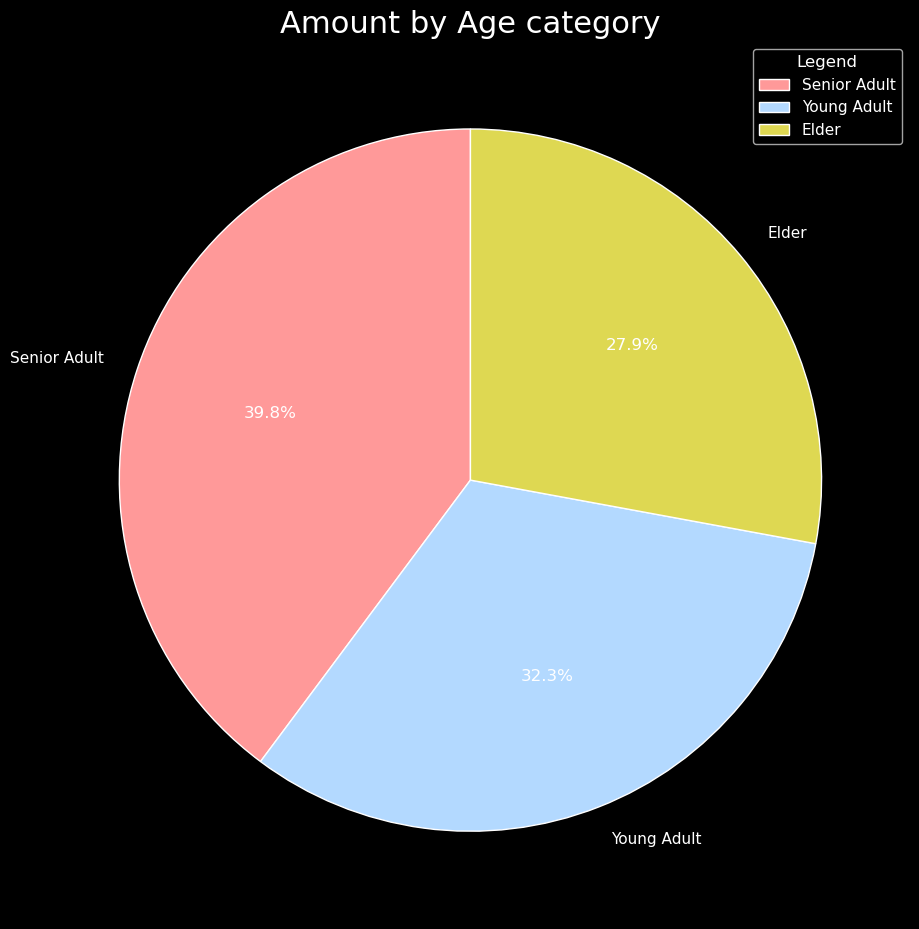

In [130]:
age_category = (
    df['age']
    .apply(
        lambda x: 'Young Adult' if 18 <=  x <= 35 
        else 'Senior Adult' if 35 < x <= 55 
        else 'Elder'
    )
)

amount = age_category.value_counts().tolist()
labels = age_category.unique().tolist()

colors= ["#ff9999", "#b3d9ff", "#DED852"]

plt.pie(amount, autopct='%1.1f%%', labels=labels, startangle=90, colors=colors)
plt.legend(loc='upper right', title='Legend')
plt.title('Amount by Age category', fontsize=22)
plt.show()

**How many males and females are represented in the dataset?**


**Answer:** The dataset contain 235 female patients and 765 male patients, where "1" represents female and "0" representes male. 

In [131]:
gender_count = df['gender'].value_counts()
gender_count

gender
1    765
0    235
Name: count, dtype: int64

In [132]:
gender_porcentage = df['gender'].value_counts(normalize = True) * 100

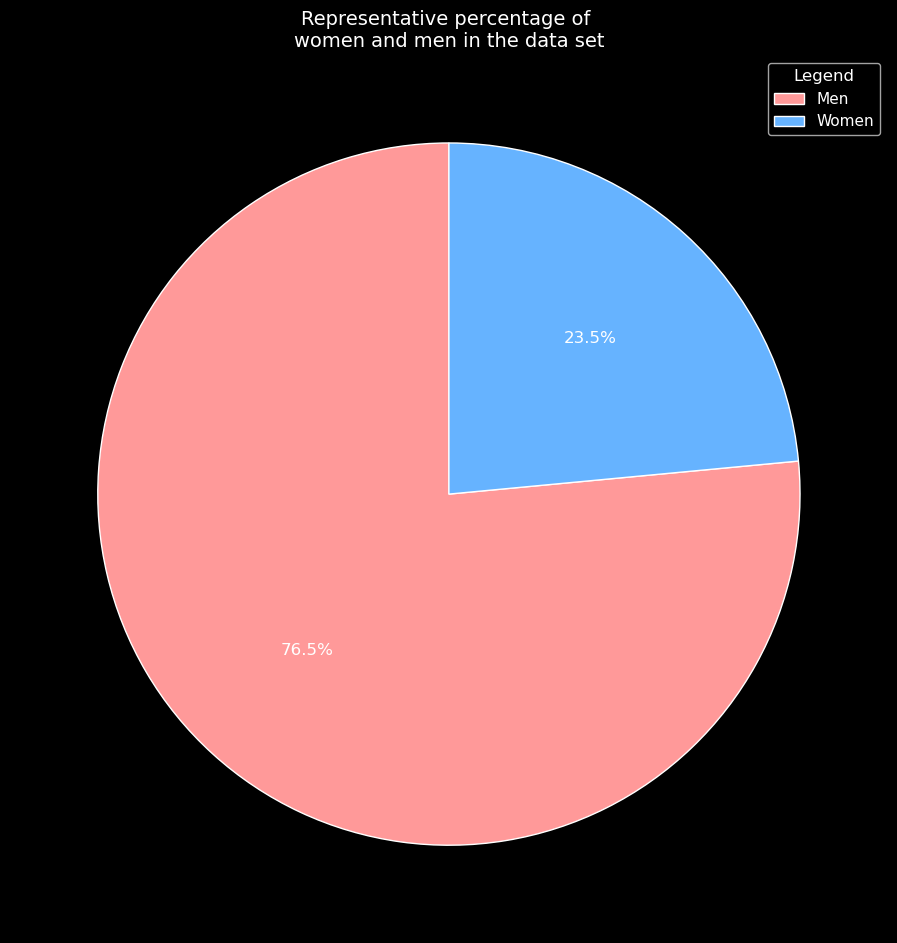

In [133]:
#Visualize
plt.pie(gender_porcentage, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Representative percentage of \nwomen and men in the data set', fontsize=14)
plt.legend(
    title='Legend',
    loc='upper right',
    labels=['Men', 'Women']
)
plt.show()


### Resting blood pressure analysis

**What is the average resting blood pressure among the patients?**

**Answer:** Average Resting Blood pressure: 151.74 mm Hg


In [134]:
average_resting_bp = df['restingBP'].mean()
print(f'Average resting blood pressure: {average_resting_bp:.2f}mm Hg')

Average resting blood pressure: 151.75mm Hg


**Are There Classifications for Resting Blood Pressure?**

Yes, according to [The british Heart fundation](https://www.bhf.org.uk/informationsupport/risk-factors/high-blood-pressure#:~:text=Normal%20blood%20pressure%20is%20usually,%2F85%20mmHg%20at%20home), resting blood pressure can be classified into several categories based on the measurement in millimeters of mercury (mm Hg): 
* Normal blood pressure: 90-120 mm Hg
* High-normal blood pressure: 120-140 mm Hg
* Stage-one: 140-160 mm Hg
* Stage-two: 160-180 mm Hg
* Stage-three: 180-200 mm hg

In [135]:
bp_category= df['restingBP'].apply(
    lambda x: 'normal' if 90 <= x < 120
    else 'high_normal' if 120 <= x < 140
    else 'stg_one' if 140 <= x < 160
    else 'stg_two' if 160 <= x < 180
    else 'stg_three' 
)

These results are intriging, they indicate that patients with stage_one > 140 mm hg mostly have heart conditions.

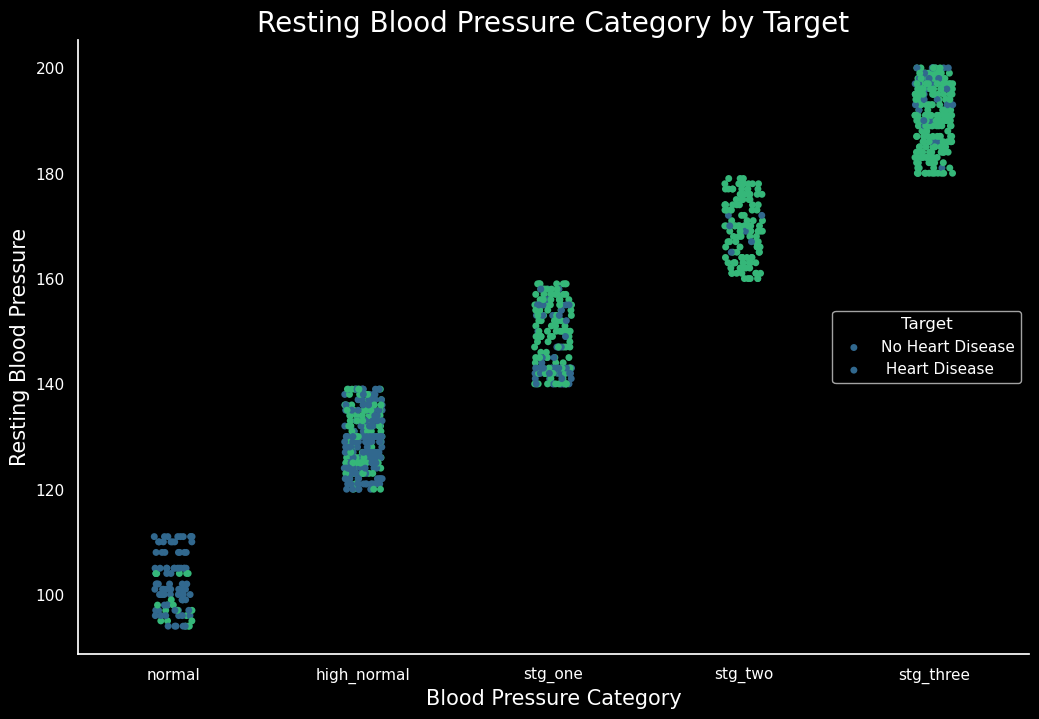

In [136]:
category_order = ['normal', 'high_normal', 'stg_one', 'stg_two', 'stg_three']

sns.catplot(
    data=df,
    x=bp_category,
    y='restingBP',
    order=category_order,
    palette='viridis',
    hue='target',
    height=7,
    aspect=1.5,
    legend=False
    
)
plt.title('Resting Blood Pressure Category by Target', fontsize=20)
plt.xlabel('Blood Pressure Category', fontsize=15)
plt.ylabel('Resting Blood Pressure', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', ' Heart Disease'], loc='right')
plt.show()

### Serum Cholesterol analysis

**How does serum cholesterol vary across different patients?**

* **Ansower:** Serum cholesterol distribution is visualized using a boxplot, distributing between 200 and 400 and there are no outliers. 

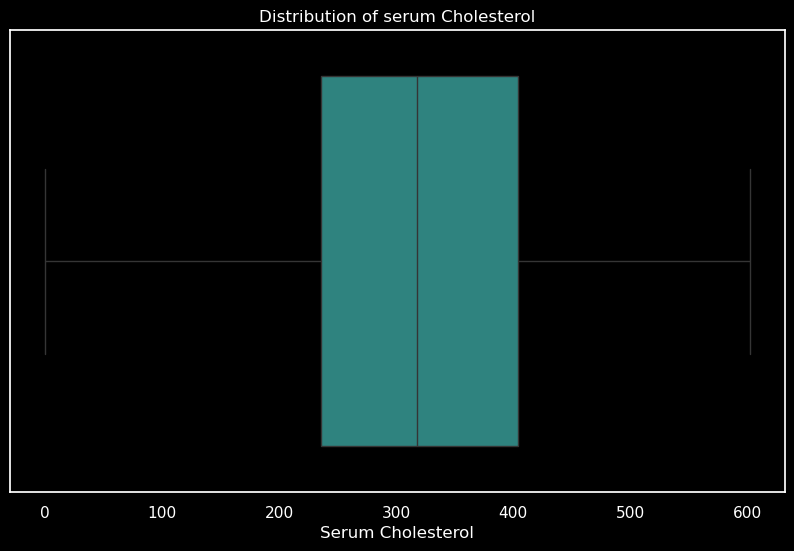

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='viridis')
plt.title('Distribution of serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

**How does serum cholesterol differ between patients with and without heart disease?**


* **Answer:** The difference in serum cholesterol levels is visualized using a boxplot, comparing patients with and without heart disease. 

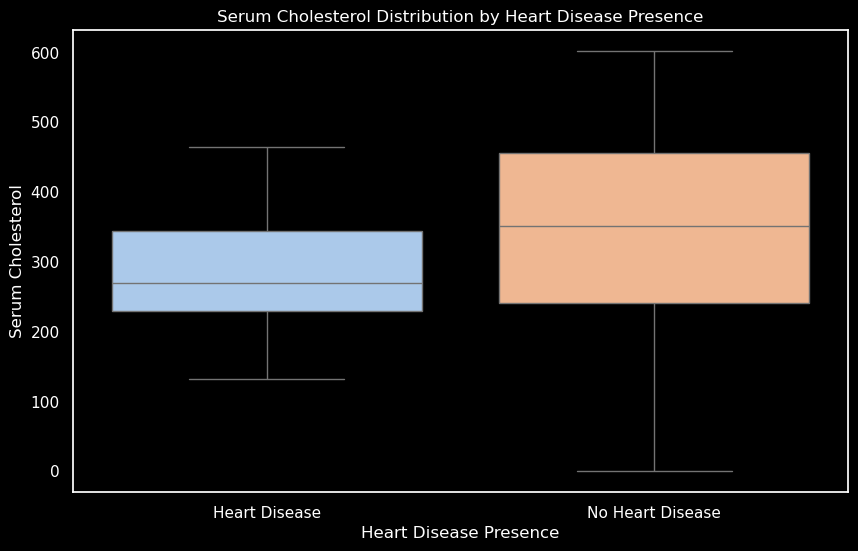

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['Heart Disease', 'No Heart Disease']) #blue yes, orange no
plt.show()

### Fasting Blood Sugar Analysis

**What percentage of patients have fasting blood sugar greater than 120 mg/dl?**

* **Answer:** Percentage of patients with high fasting blood sugar: 29.6 % 

In [139]:
percentage_high_fasting_sugar = df['fastingbloodsugar'].sum() / len(df) * 100

print(f'Percentage of patients with high fasting blood sugar: {percentage_high_fasting_sugar:.2f}%')

Percentage of patients with high fasting blood sugar: 29.60%


In [140]:
# # Visualization
# high_fasting_sugar_porcentage = df['fastingbloodsugar'].value_counts(normalize = True) * 100

# plt.pie(high_fasting_sugar_porcentage, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
# plt.title('Percentage of patients with high fasting blood sugar', fontsize=14)
# plt.legend(
#     title='Legend',
#     loc='upper right',
#     labels=['No', 'Yes']
# )	
# plt.show()

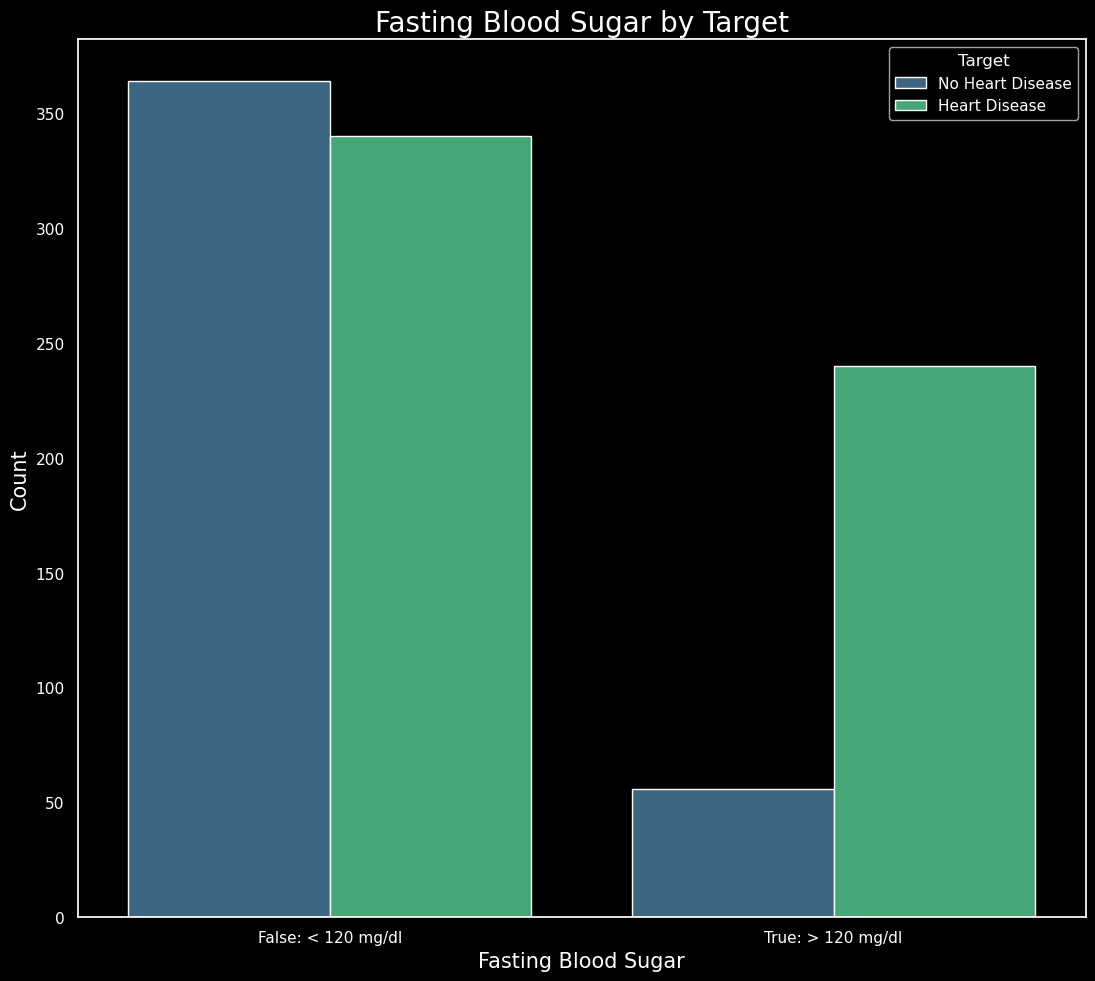

In [141]:
sns.countplot(x='fastingbloodsugar', data=df, hue='target', palette='viridis')
plt.title('Fasting Blood Sugar by Target', fontsize=20)
plt.xlabel('Fasting Blood Sugar', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['False: < 120 mg/dl', 'True: > 120 mg/dl'])
plt.ylabel('Count', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

### Chest Pain analysis
**What is the most common type of chest pain observed in the patients?**

* **Answer:** Chest pain type 2 (Atyplical Angina)

In [142]:
chest_pain_counts = df['chestpain'].value_counts()
chest_pain_counts

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64

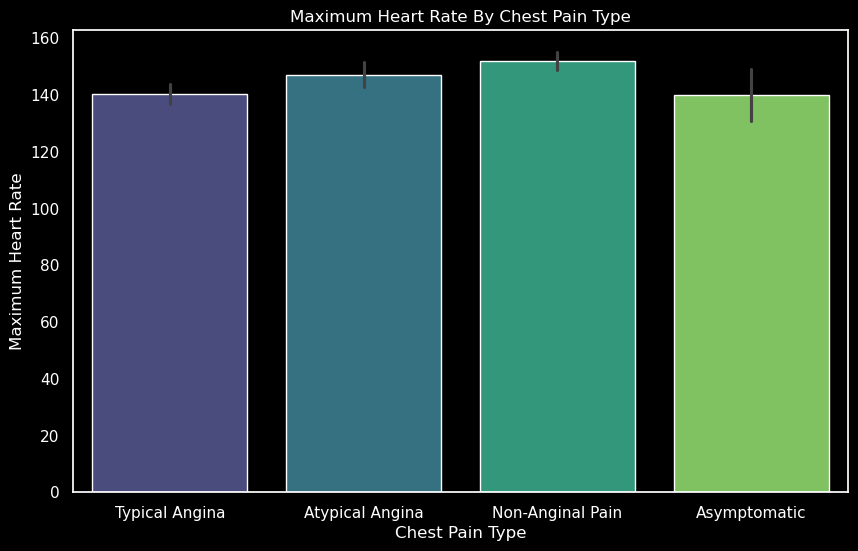

In [143]:
#visualization: 
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate By Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.ylabel('Maximum Heart Rate')
plt.show()

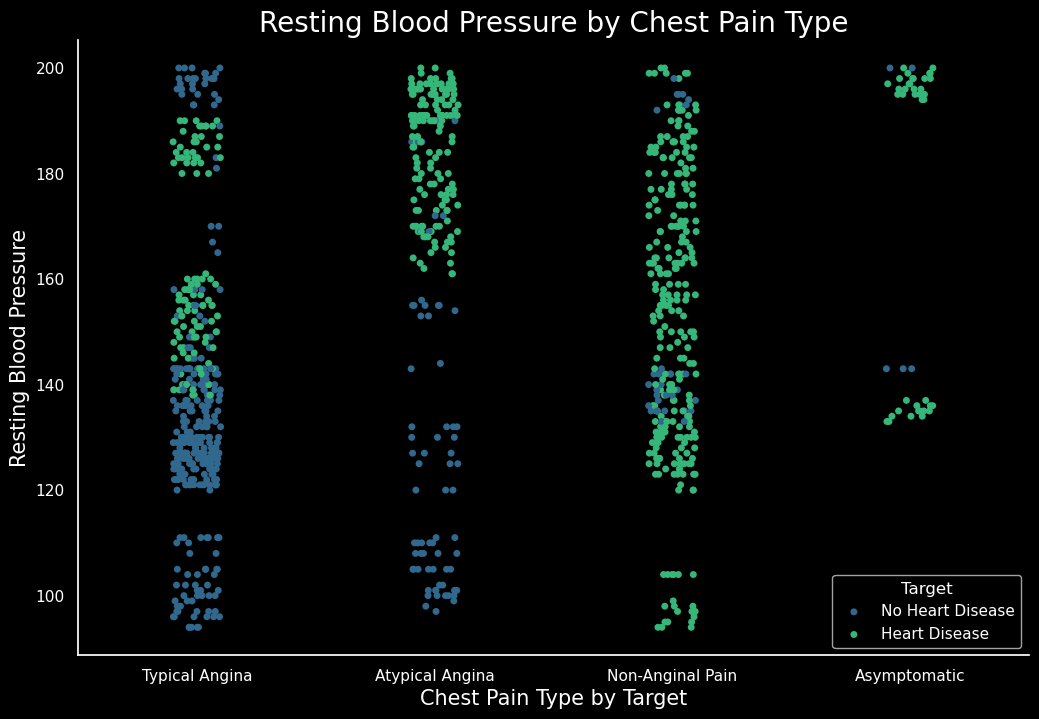

In [144]:
sns.catplot(
    data=df,
    x='chestpain',
    y='restingBP',
    palette='viridis',
    hue='target',
    height=7,
    aspect=1.5,
    legend=False
)

plt.title('Resting Blood Pressure by Chest Pain Type', fontsize=20)
plt.xlabel('Chest Pain Type by Target', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.ylabel('Resting Blood Pressure', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='lower right')
plt.show()

### Electrocardiogram analysis
**What are the predominant resting elecotrocardiogram results in the dataset?**

* **Answer:** There are 3 types of resting electrocardiogram results and they are in this order (Normal(0) = 454, Abnormality(1) = 344 and hypertrophy(2) = 202 )



In [145]:
resting_electro_counts = df['restingrelectro'].value_counts()
resting_electro_counts

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64

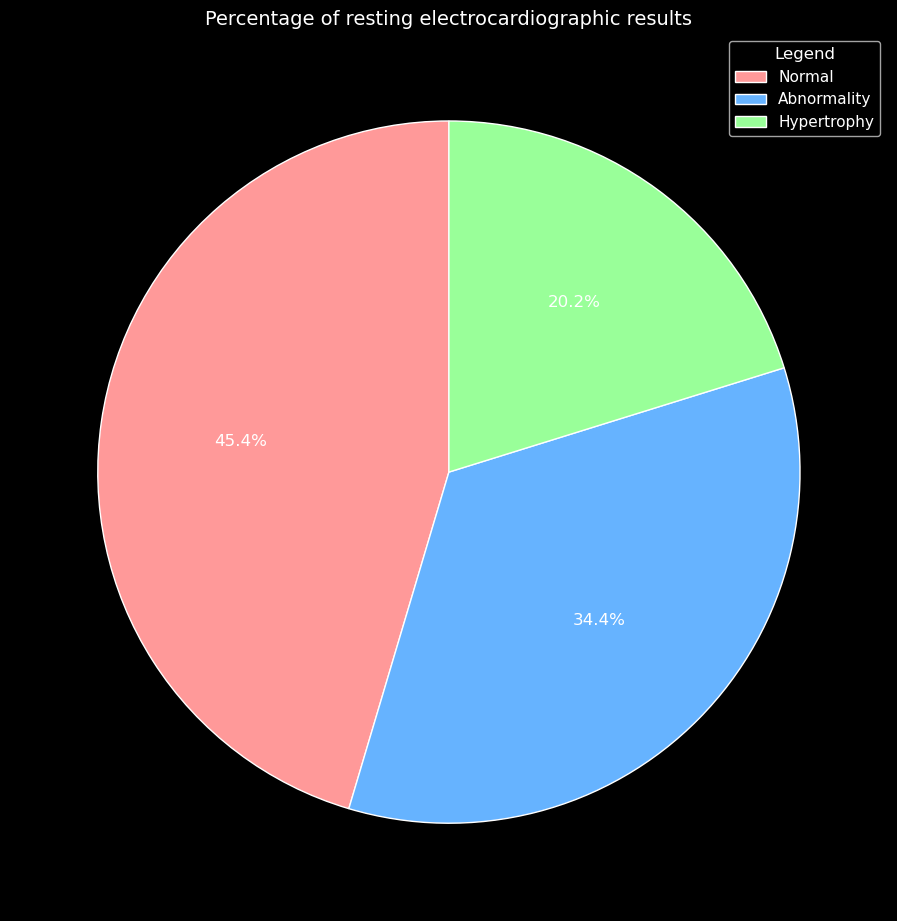

In [146]:
resting_electro_porcentage = df['restingrelectro'].value_counts(normalize = True) * 100

plt.pie(resting_electro_porcentage, autopct='%1.1f%%', colors=['#ff9999','#66b3ff', '#99ff99'], startangle=90)
plt.title('Percentage of resting electrocardiographic results', fontsize=14)
plt.legend(
    title='Legend',
    loc='upper right',
    labels=['Normal', 'Abnormality', 'Hypertrophy']
)
plt.show()

**What is the averege maximun heart rate achieved by the patients on average?**

* **Answer:** Average maximun heart rate: 145.48 bpm



In [147]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f'Average maximum Heart Rate: {average_max_heart_rate:.2f}bpm')

Average maximum Heart Rate: 145.48bpm


**How many patients experienced exercise-induced angina?**

* **Answer:** Number of patients with exercise-induced angina: 498 cases


In [148]:
exercise_angina_count = df['exerciseangia'].sum()
print(f'Number of patients with exercise-induced angina: {exercise_angina_count}')

Number of patients with exercise-induced angina: 498


**What is the average oldpeak(ST depression induced by exercise relative to rest) among the patients?**

* **Answer:** Average oldpeak: 2.71


In [149]:
average_oldpeak = df['oldpeak'].mean()
print(f'Average Oldpeak {average_oldpeak:.2f}')

Average Oldpeak 2.71


**How is the slope of the peak exercise ST segment distributed in the dataset?**

* The distribution of the slope is visualized using a countplot, showing the frequency of each slope type in the 'slope' column.
* Two categories of slope, flat and downsloping, are most likely associated with heart diseases.













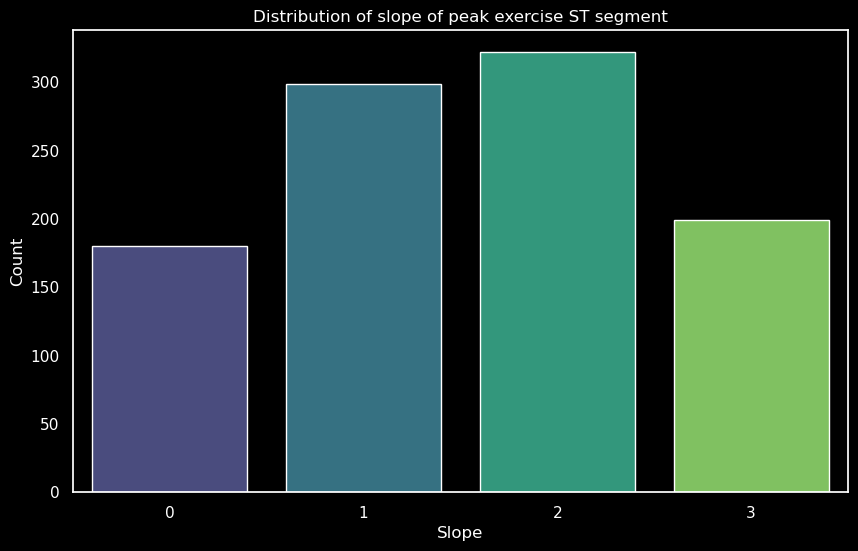

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of slope of peak exercise ST segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

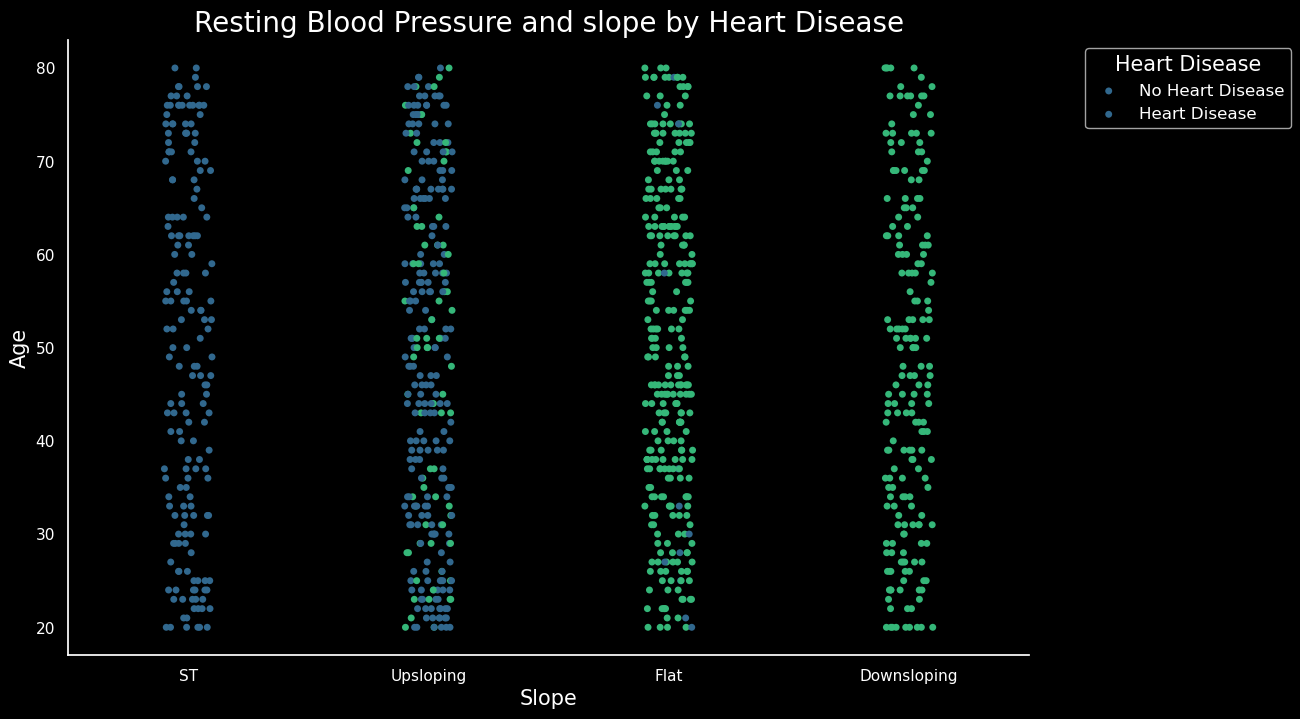

In [151]:
sns.catplot(
    data=df,
    x='slope',
    y='age',
    palette='viridis',
    hue='target',
    height=7,
    aspect=1.5,
    legend=False
   
)
plt.title('Resting Blood Pressure and slope by Heart Disease', fontsize=20)
plt.xlabel('Slope', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=['ST','Upsloping', 'Flat', 'Downsloping'])
plt.ylabel('Age', fontsize=15)
plt.legend(
    title='Heart Disease', 
    labels=['No Heart Disease', 'Heart Disease'], 
    fontsize=12, 
    title_fontsize=15, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)
plt.show()



**What is the range of the number of major vessels in the patients?**

* **Answer:** Number of Major Vessels range: 0 - 3


In [152]:
vassels_rage = f"Number of Major vessels range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}" 
print(vassels_rage)

Number of Major vessels range: 0 - 3


**How many patients have all three major vessels showing defects?**

* **Answer**: Number of patients with defects in All Three Major Vesels: 116



In [153]:
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f'Number of patients with defects in All Three Major Vessels: {defects_count}')

Number of patients with defects in All Three Major Vessels: 116


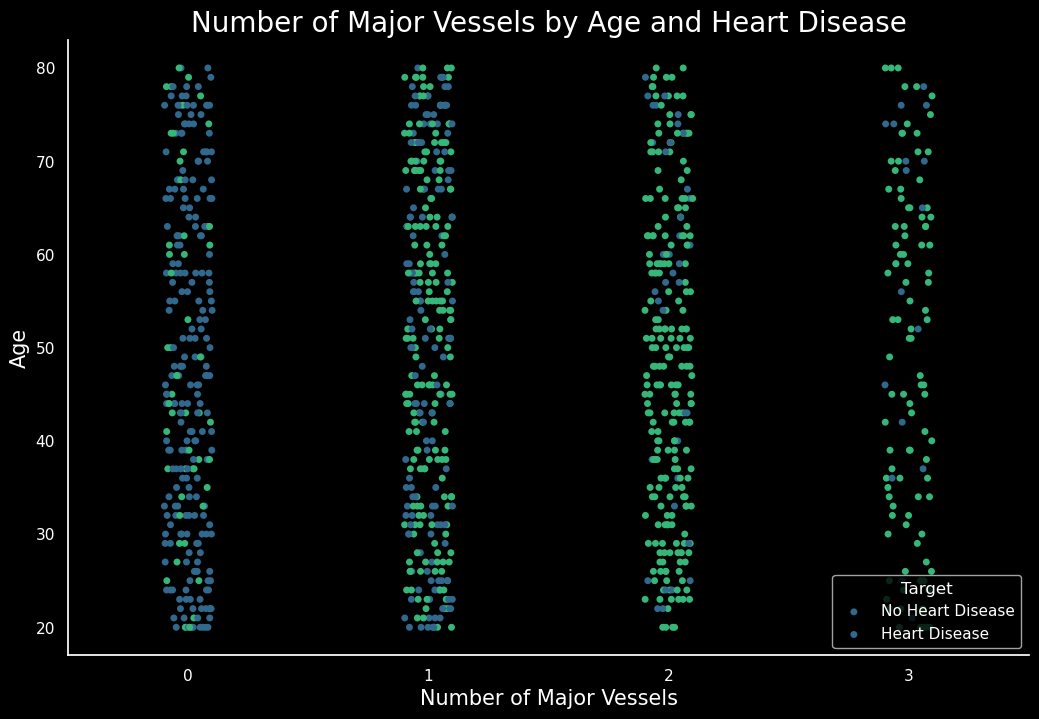

In [154]:
sns.catplot(
    data=df,
    x='noofmajorvessels',
    y='age',
    palette='viridis',
    hue='target',
    height=7,
    aspect=1.5,
    legend=False
)

plt.title('Number of Major Vessels by Age and Heart Disease', fontsize=20)
plt.xlabel('Number of Major Vessels', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='lower right')

**What percentage of patients in the dataset have heart disese (target = 1)?**

* **Answer:** Percentage of Patients with Heart disese: 58%


In [155]:
percentage_heart_disese = (df['target'].sum() / len(df) )* 100
print(f'Percentage of Patients with Heart disese: {percentage_heart_disese:.2f}%')


Percentage of Patients with Heart disese: 58.00%


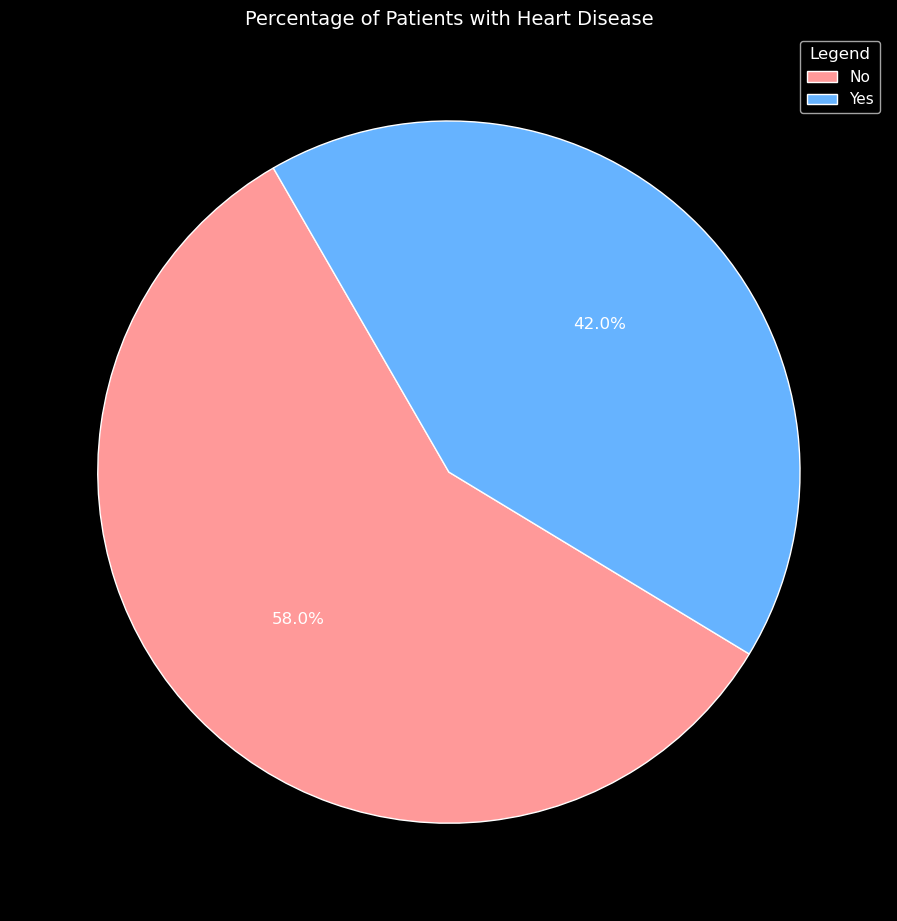

In [156]:
heart_disease_prctge = df['target'].value_counts(normalize=True) * 100

plt.pie(
    heart_disease_prctge, 
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff'], 
    startangle=120
)
plt.title('Percentage of Patients with Heart Disease', fontsize=14)
plt.legend(
    title='Legend',
    loc='upper right',
    labels=['No', 'Yes']
)
plt.show()

### Target Categorizing

In [157]:
# Target classes:

df_model = df.copy()
df_model.target.unique()

array([1, 0])

In [158]:
df_model = df_model.replace({'target' : {
            0 : 'Absence of Heart Disease',
            1 : 'Presence of Heart Disease',
        }}
)
df_model.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,Presence of Heart Disease
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,Absence of Heart Disease
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,Absence of Heart Disease
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,Presence of Heart Disease
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,Presence of Heart Disease


### Normalization

* First, Our inputs variable are : patientid, age, gender, chestpain, restingBP, serumcholestro, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels,and our target is `target`column that has 0: `Absense of Heart Disease`, 1: `Presence of Heart Disease`. Therefore, the dataset has to predict `classification models`.

In [159]:
# Create X from dataFrame and y as Target
X_disease = df_model.drop(columns=['target','age','patientid', 'exerciseangia'])
y = df_model.target


In [160]:
# print('Proporciones categorías (0s/1s) set desbalanceados: ')
# print(f'\t{np.sum(y==0)/len(y)}/{np.sum(y==1)/len(y)}')

In [161]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)

X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe()

,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,oldpeak,slope,noofmajorvessels
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.765000,0.326667,0.544783,0.517354,0.296000,0.374000,0.568527,0.436726,0.513333,0.407333
std,0.424211,0.317719,0.282691,0.220006,0.456719,0.385061,0.260994,0.277541,0.334566,0.325862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.330189,0.391611,0.000000,0.000000,0.372137,0.209677,0.333333,0.000000
50%,1.000000,0.333333,0.500000,0.528239,0.000000,0.500000,0.572519,0.387097,0.666667,0.333333
75%,1.000000,0.666667,0.820755,0.671512,1.000000,0.500000,0.793893,0.661290,0.666667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modelling

In [162]:
# ploting confusion matrix

def clf_plot(y_pred):

    cm = metrics.confusion_matrix(y_test, y_pred_rf)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    fig.subplots_adjust(wspace=0.5)


    # left: Confusion matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'], fontsize=10)
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'], fontsize=10)

    # right: Classification report
    ax[1] = sns.heatmap(
        cr, 
        annot=True, 
        cmap='plasma', 
        linecolor='white', 
        linewidth=.5, 
        ax=ax[1]
    )
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [163]:
df_model.target.value_counts()

target
Presence of Heart Disease    580
Absence of Heart Disease     420
Name: count, dtype: int64

In [164]:
# Split Dataframe 80%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=0)

# Split Dataframe 50%
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=0)

### Random Forest Classifier

First at all, let's try it with `Random forest classifier` 

In [165]:
# Dictionary to define parameters to test in algorithm

# Definimos parámetros epara la Busuqeda de hiperparámetros
parameters = {
    'n_estimators' : [50, 150, 500], # Numero de árboles en el bosque
    'criterion' : ['gini', 'entropy', 'log_loss'], # Criterio de evaluación
    'max_features' : ['sqrt', 'log2'] # Número de características a considerar en cada división
}

rf = RandomForestClassifier(n_jobs=-1) # nucleos
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print(f'Tuned hyped parameters : {rf_cv.best_params_}')
print(f'Accuracy: {rf_cv.best_score_}')

Tuned hyped parameters : {'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 50}
Accuracy: 0.9800000000000001


In [166]:
# Model : 
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [167]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_train, y_train), 3)
print(f'Random Forest Accuracy: {rf_score}')

Random Forest Accuracy: 1.0


In [168]:
rf_score = round(rf.score(X_test, y_test), 3)
print(f'Random Forest Accuracy: {rf_score}')

Random Forest Accuracy: 0.99


In [169]:
rf_score = round(rf.score(X_val, y_val), 3)
print(f'Random Forest Accuracy: {rf_score}')

Random Forest Accuracy: 0.98


In [170]:
y_test.value_counts()

target
Presence of Heart Disease    58
Absence of Heart Disease     42
Name: count, dtype: int64

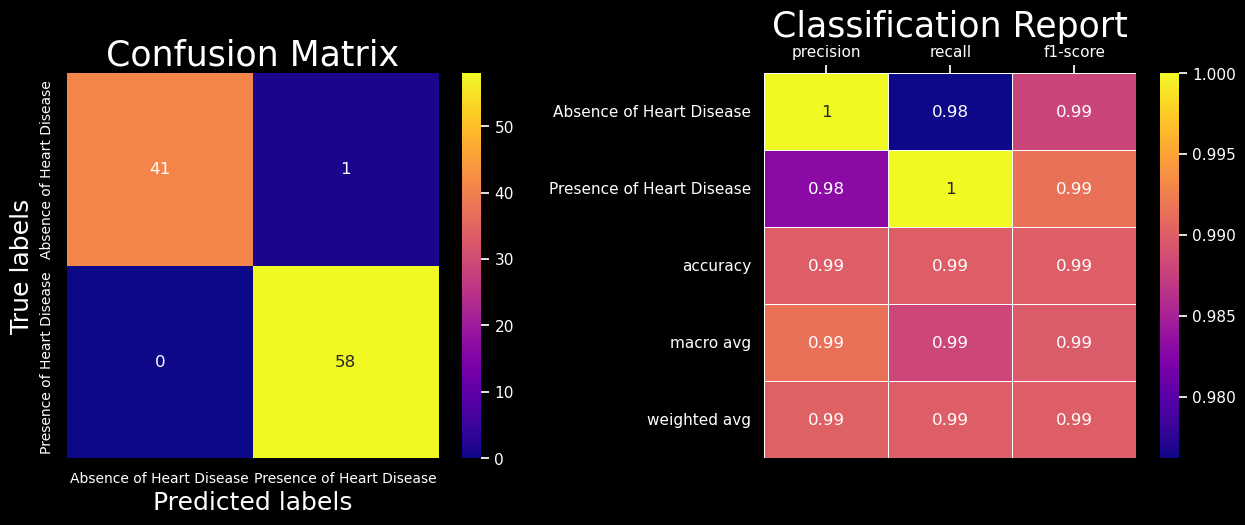

In [172]:
#ploting confusion matrix

clf_plot(y_pred_rf)

### Logistic Regression

In [173]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}


lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, y_train)  
print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
accuracy :  0.9600000000000002


In [174]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [175]:
y_pred_lr = lr.predict(X_test)
lr_score = round(lr.score(X_test, y_test), 3)
print(f'Logistic Regression Accuracy: {lr_score}')

Logistic Regression Accuracy: 0.98


In [197]:
y_pred_lr = lr.predict(X_val)
lr_score = round(lr.score(X_val, y_val), 3)
print(f'Logistic Regression Accuracy: {lr_score}')

Logistic Regression Accuracy: 0.97


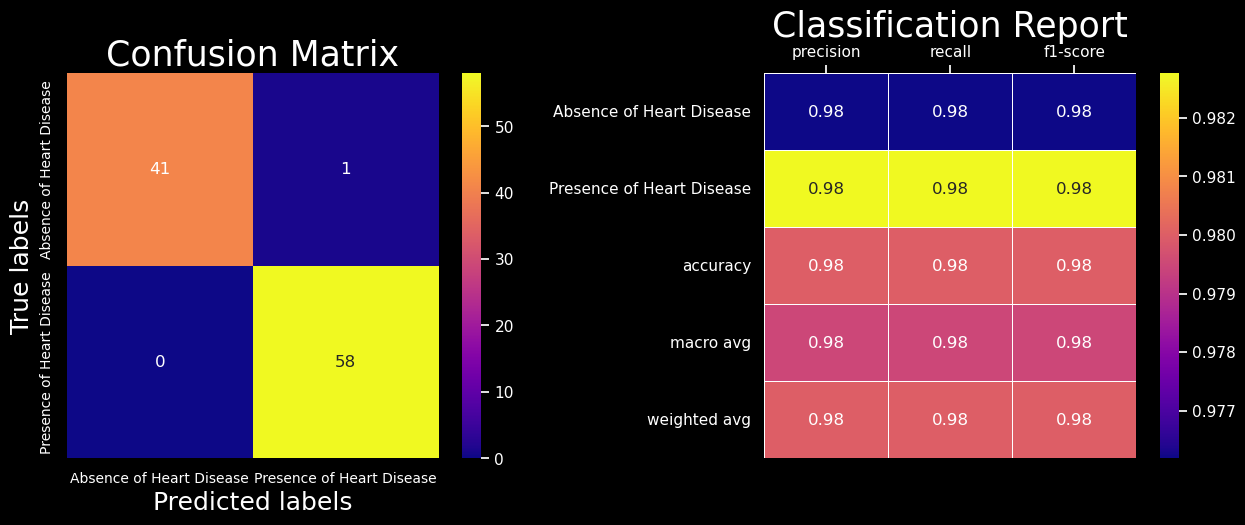

In [176]:
clf_plot(y_pred_lr)

### SVC

In [177]:
# Dictionary to define parameters to test in algorithm 

parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 1.0}
accuracy :  0.9787500000000001


In [178]:
# Model 
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [179]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score: ', svc_score)

SVC Score:  0.99


In [198]:
svc_score = round(svc.score(X_val, y_val), 3)
print('SVC Score: ', svc_score)

SVC Score:  0.95


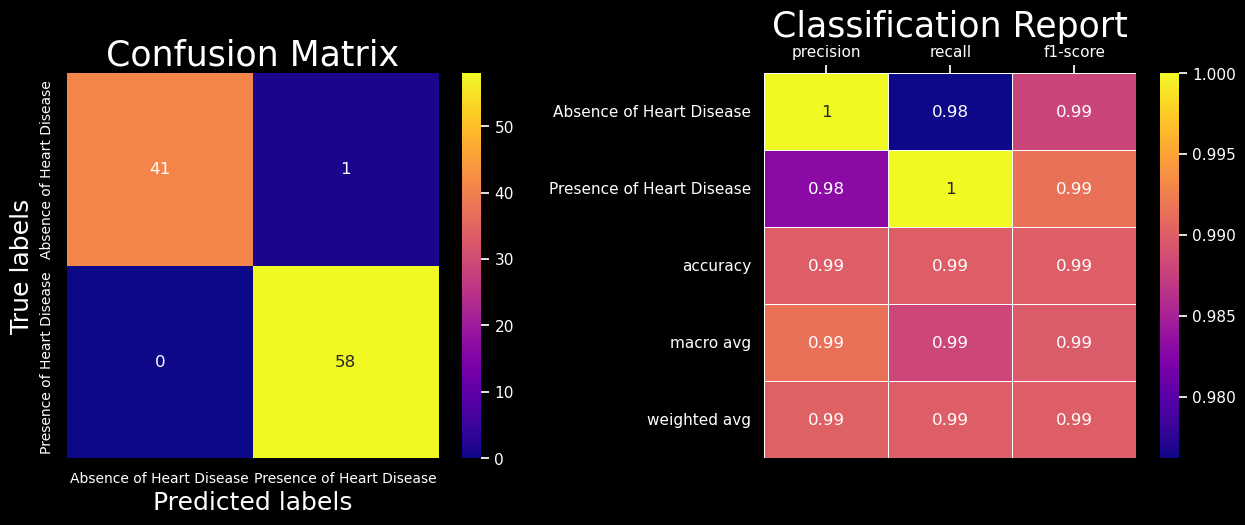

In [199]:
clf_plot(y_pred_svc)

### Decision Tree Classfier

In [181]:
# Dictionary to define parameters to test in algorithm

parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': 27, 'splitter': 'random'}
accuracy :  0.9712500000000001


In [182]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [183]:
y_pred_tree = tree.predict(X_test)

tre_score = round(tree.score(X_test, y_test), 3)
print('Decision Tree Score: ', tre_score)

Decision Tree Score:  1.0


In [200]:
tre_score = round(tree.score(X_val, y_val), 3)
print('Decision Tree Score: ', tre_score)

Decision Tree Score:  0.96


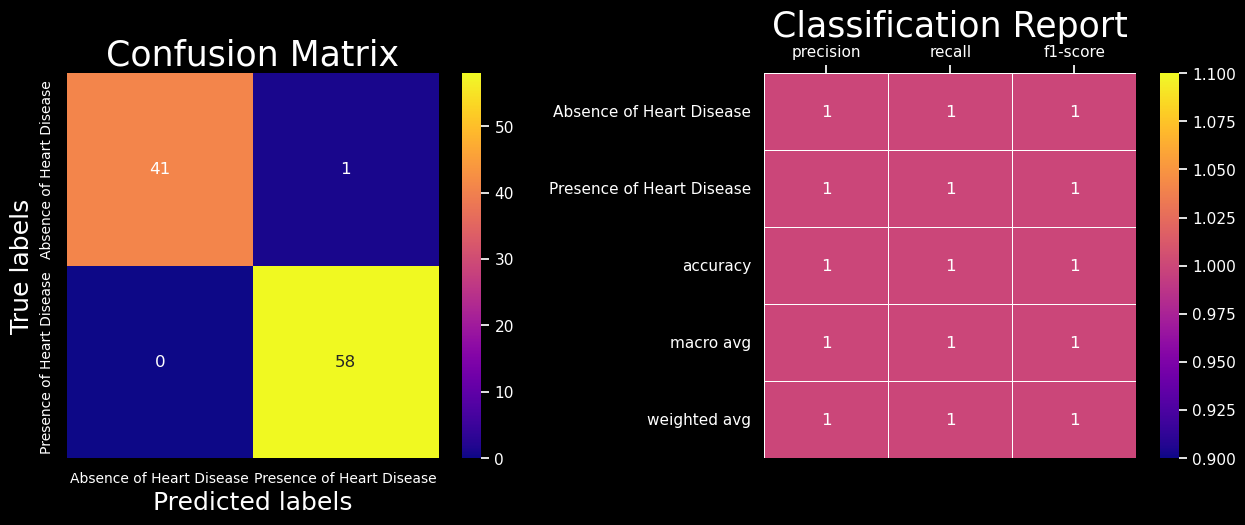

In [184]:
clf_plot(y_pred_tree)

### K-Neighbors Classifier

In [185]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights' : ['uniform', 'distance'],
    'p': [1,2,3,4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
accuracy :  0.9700000000000001


In [186]:
Knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [202]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn_cv.score(X_test, y_test), 3)
print('KNeighborsClassifier Score: ', knn_score)

KNeighborsClassifier Score:  0.97


In [203]:
knn_score = round(knn_cv.score(X_val, y_val), 3)
print('KNeighborsClassifier Score: ', knn_score)

KNeighborsClassifier Score:  0.97


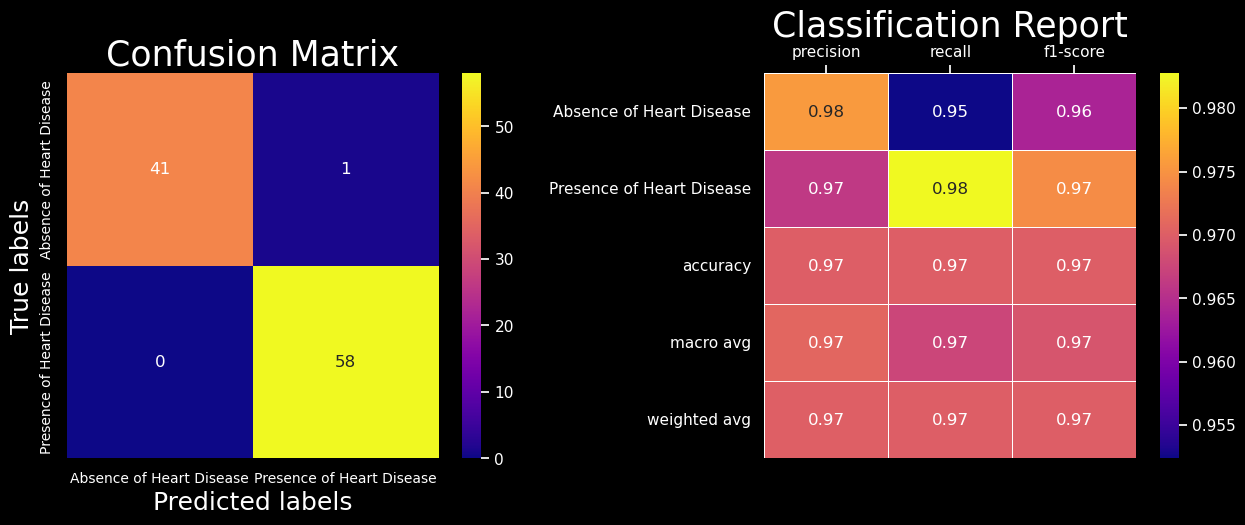

In [188]:
clf_plot(y_pred_knn)

### Gaussian NB

In [189]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GaussianNB Score: ', gnb_score)

GaussianNB Score:  0.94


In [204]:
gnb_score = round(gnb.score(X_val, y_val), 3)
print('GaussianNB Score: ', gnb_score)

GaussianNB Score:  0.96


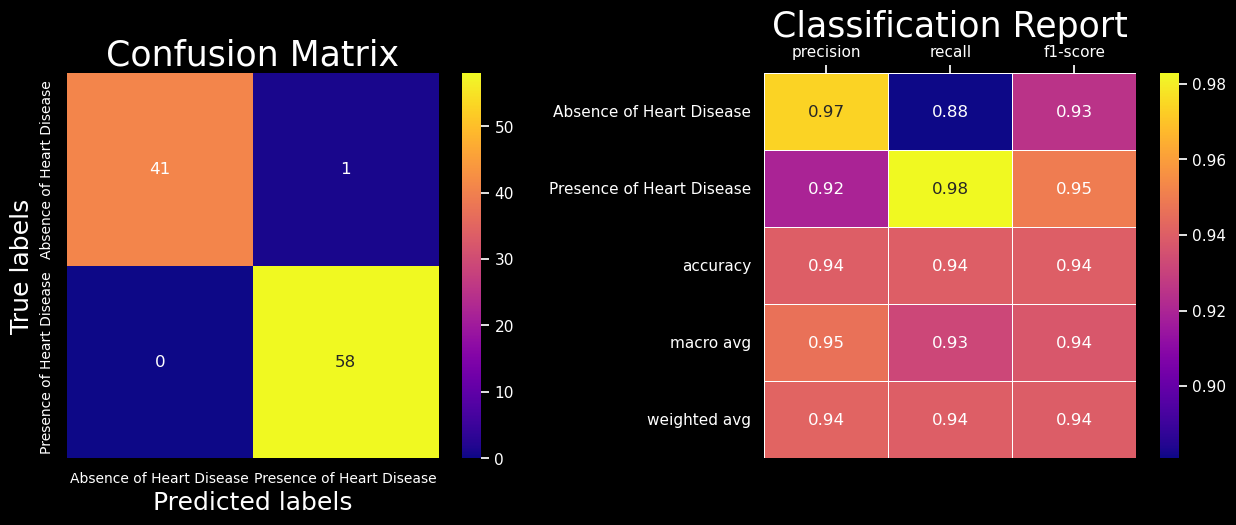

In [205]:
clf_plot(y_pred_gnb)


### Result

In [206]:
result = pd.DataFrame(
    {
        'Algorithm' : [
            'RandomForestClassifier',
            'LogisticRegression',
            'SVC',
            'DecisionTreeClassifier',
            'KNeighborsClassifier',
            'GaussianNB'
            ],
        'Score' : [
            rf_score,
            lr_score,
            svc_score,
            tre_score,
            knn_score,
            gnb_score
        ]
    }
)

result.sort_values(by='Score', ascending=True)

,Algorithm,Score
2,SVC,0.95
3,DecisionTreeClassifier,0.96
5,GaussianNB,0.96
1,LogisticRegression,0.97
4,KNeighborsClassifier,0.97
0,RandomForestClassifier,0.98


In [207]:
sns.set_palette('muted')

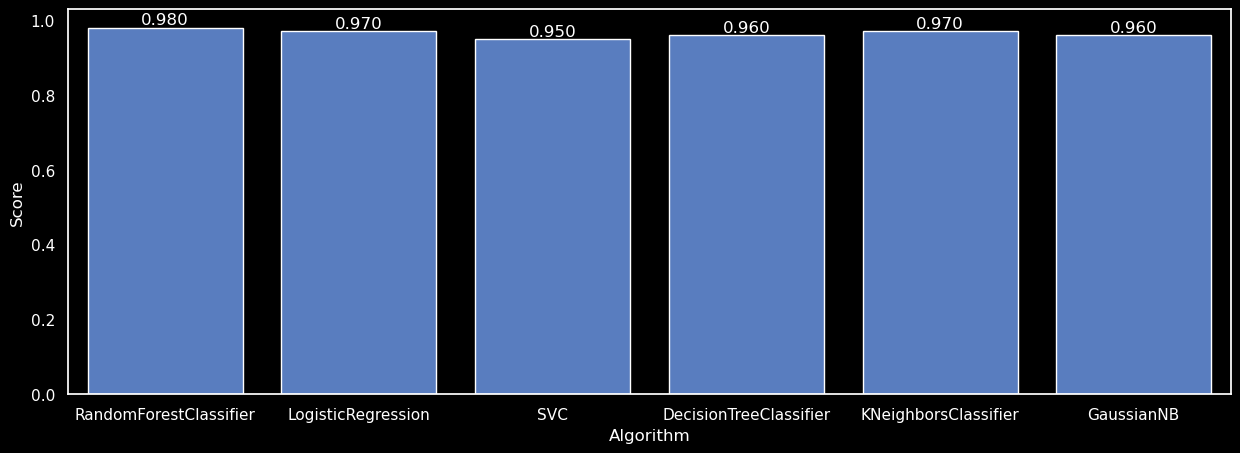

In [208]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm)
plt.show()

### Results

Based on the above plots, best algorithm base on Score is: `Random Forest Classifier`

### Final Modeling



In [194]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [195]:
rf.fit(X, y)

RandomForestClassifier(criterion='log_loss', n_estimators=50)